In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
%matplotlib inline

In [18]:
import pandas as pd

In [20]:
datos = pd.read_csv(r'C:\Users\ryzen 5\Desktop\UNAD\cuarto semestre\ANALIZIS DE DATOS\SEGUNDA FASE\tarea 2\Anexo 3 - Dataset Heart Disease Cleveland UCI\heart_cleveland_upload.csv')

In [22]:
print("Primeras filas de los datos:")
display(datos.head())

Primeras filas de los datos:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [23]:
print("\nEstadísticas descriptivas para variables numéricas:")
display(datos.describe())



Estadísticas descriptivas para variables numéricas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


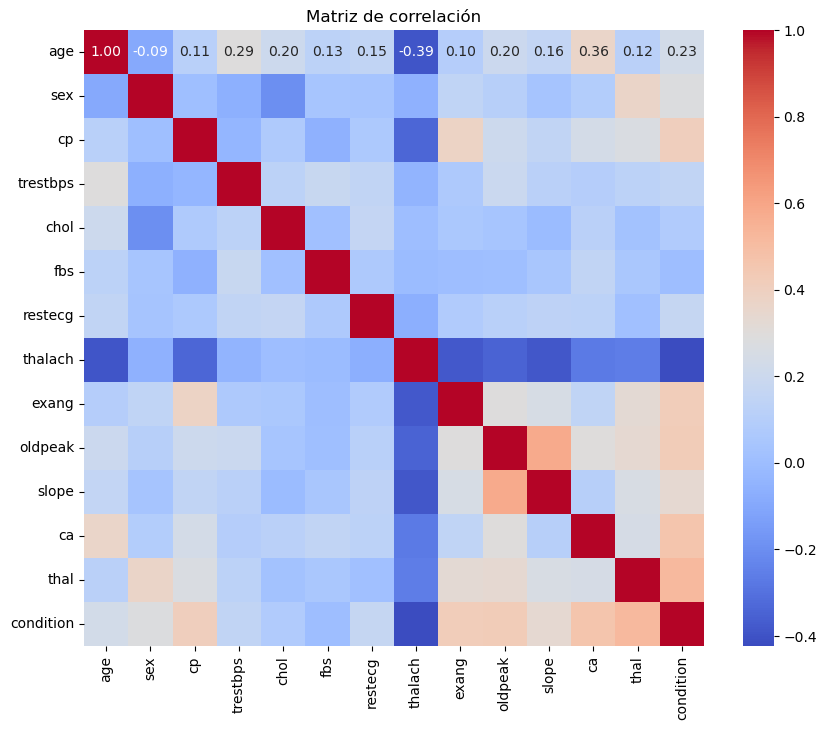

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [23]:
X = datos.loc[:, ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']]
y = datos['condition']  # No es necesario usar .loc para seleccionar una sola columna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
282,43,1,3,120,177,0,2,120,1,2.5,1,0,2,1
81,67,0,2,152,277,0,0,172,0,0.0,0,1,0,0
108,54,1,2,120,258,0,2,147,0,0.4,1,0,2,0
146,42,1,2,130,180,0,0,150,0,0.0,0,0,0,0
217,58,1,3,146,218,0,0,105,0,2.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,53,0,3,130,264,0,2,143,0,0.4,1,0,0,0
192,61,1,3,120,260,0,0,140,1,3.6,1,1,2,1
117,52,1,2,172,199,1,0,162,0,0.5,0,0,2,0
47,52,1,1,134,201,0,0,158,0,0.8,0,1,0,0


In [37]:
lr_model = LogisticRegression(max_iter=800)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=800)

In [40]:
models = {'Logistic Regression': lr_model}  # Aquí, utilizamos lr_model en lugar de dt_model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Modelo: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Modelo: Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[22  0]
 [ 0 38]]



<Axes: >

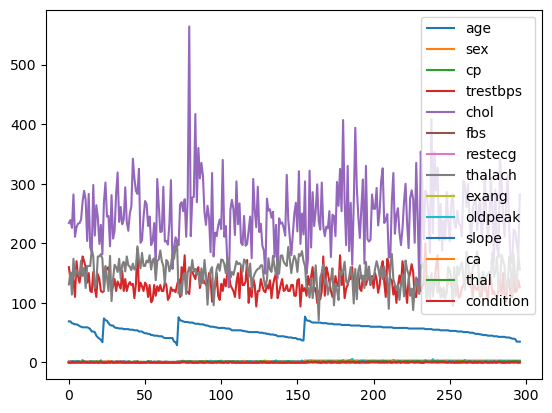

In [50]:
datos.plot()

<Axes: >

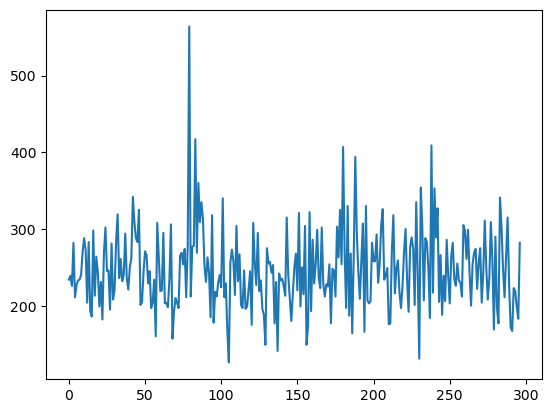

In [52]:
datos['chol'].plot()

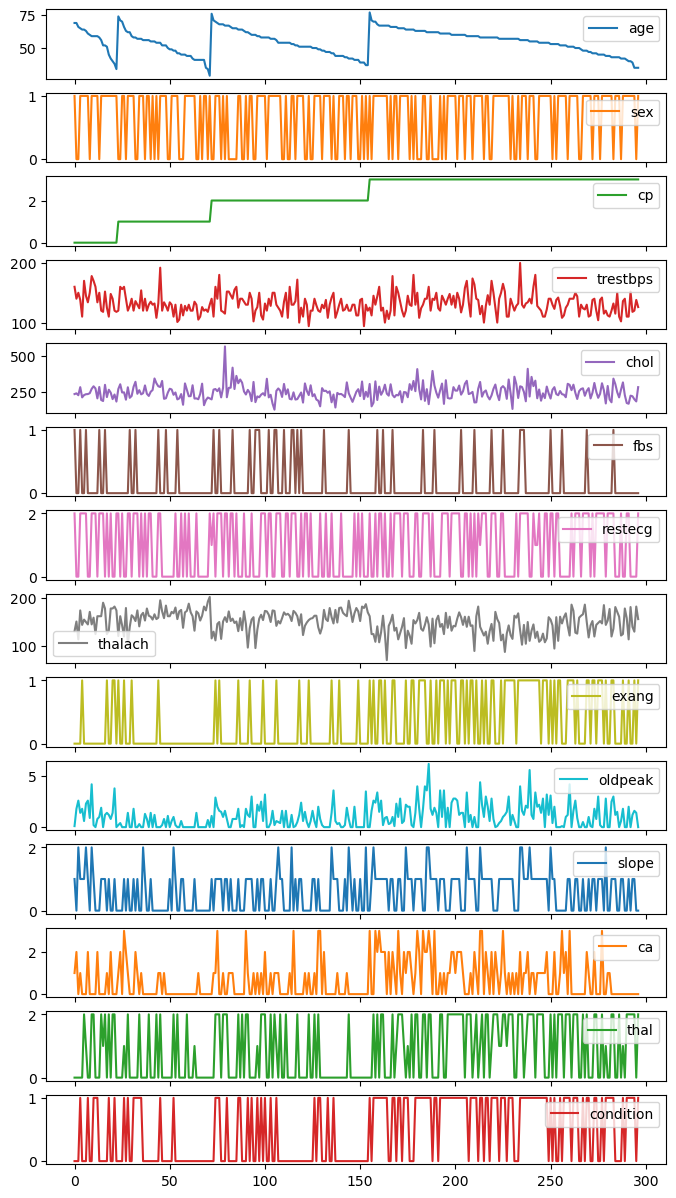

In [58]:
import matplotlib.pyplot as plt
gra3 = datos.plot(figsize=(8, 15), subplots=True)
plt.show()


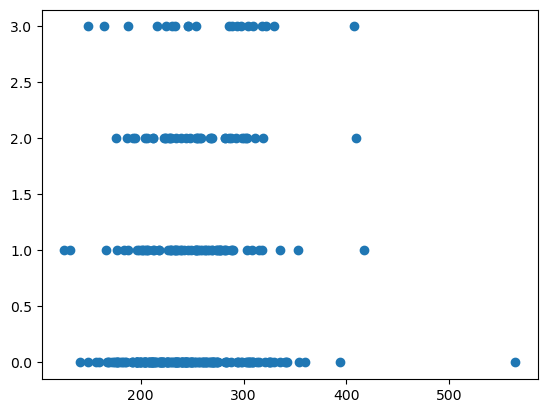

In [61]:
plt.scatter(datos['chol'],datos['ca'])

<Axes: >

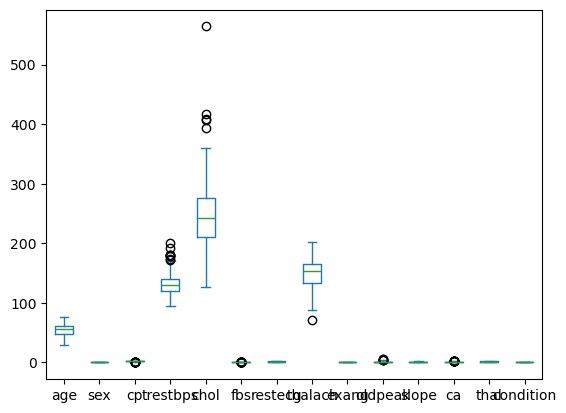

In [63]:
datos.plot.box()